### SIMULATION

In [40]:
# Import all the used package

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Generating Functions

In [41]:
# The function for generating n tosses of a coin and print out the sequence of head and tail
# Input n is any integer

def coin(n):
    result = np.random.choice(['H', 'T'], n, p = [0.5, 0.5])
    return result
    print(result)

In [42]:
# An example of calling the function using input of 5

coin(5)

array(['H', 'H', 'T', 'H', 'T'], dtype='<U1')

In [43]:
# The function for generating the maximum of all the head runs
# Input x is a list or array which is generated from the coin(n) function

def head_max(x):
    head = 0
    head_run = []
    for i in x:
        if i == 'H':
            head += 1
            head_run.append(head)
        elif i != 'H':
            head_run.append(head)
            head = 0
    return max(head_run)

In [44]:
# An example of calling the function using the output from a coin(10) as the input for the head_max(x) function

y = coin(10)
print(y)
head_max(y)

['T' 'H' 'H' 'H' 'T' 'H' 'T' 'H' 'H' 'T']


3

In [45]:
# The function for generating a number of simulation for n coin tosses
# Input s is the number of simulation to run, input n is the number of coin tosses per simulation

def simulation(s, n):
    simulation_result = []
    for i in range(s):
        simulation_result.append(head_max(coin(n)))
    return simulation_result

In [46]:
# An example of calling the function using 10 simulations and 10 coin tosses per simulation

simulation(10, 10)

[2, 1, 3, 6, 1, 4, 2, 3, 3, 2]

#### Runing a simulation

In [47]:
# Please input the number of coin toss and the number of simulation

n = int(input("Number of coin toss? "))
s = int(input("Number of simulation? "))
print(n)
print(s)

Number of coin toss? 1000
Number of simulation? 50000
1000
50000


In [48]:
# A simulation with 50000 simulation and 1000 coin tosses per simulation

sim_result = simulation(s, n)

In [49]:
# Descriptive statistics of the simulation result, the mean is 9.32 (around 9), we need to find the mode

data = pd.DataFrame(sim_result)
data.columns = ['head_max']
data.describe()

,head_max
count,50000.000000
mean,9.315920
std,1.865096
min,5.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,22.000000


C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


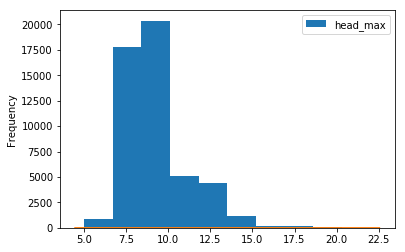

In [50]:
# Histogram of the result

data.plot.hist()
sns.distplot(data)

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


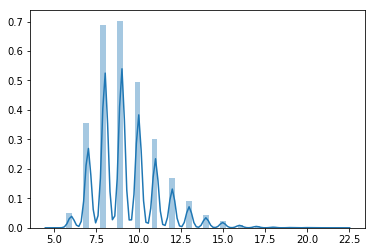

In [51]:
sns.distplot(data)

In [52]:
# Count the frequency of the result, 9 is the mode

data['head_max'].value_counts()

9     11947
8     11707
10     8424
7      6048
11     5115
12     2850
13     1537
6       880
14      733
15      387
16      181
17      102
18       46
19       18
20       14
21        6
5         4
22        1
Name: head_max, dtype: int64

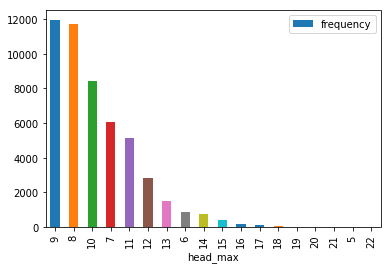

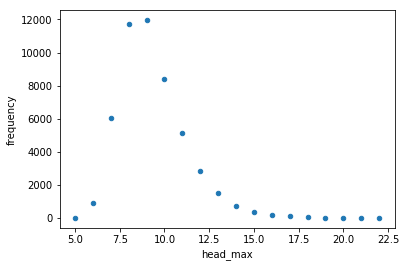

In [53]:
# Plot of a bar chart and a scatter plot, 9 is the most probable value

sim = pd.DataFrame(data['head_max'].value_counts()).reset_index()
sim.columns = ['head_max', 'frequency']
sim.plot.bar('head_max', 'frequency')
sim.plot.scatter('head_max', 'frequency')

#### Conclusion: From the simulation of 50,000 times of 1,000 coin flips per simulation, the most probable head run would be 9.  However, obersving a 6 is probable as well and would not be able to establish a judgement on the fairness of the coin.  From 50,000 simulations, there were 880 times of 6.  In addition, the number of std = (9.32 - 6)/1.87 = 1.78 is within 2.  Therefore, I would not conclude that the coin is unfair because 6 is a possible outcome for one simulation, although the likihood of observing 6 is low as obeserved in 50,000 simulation.